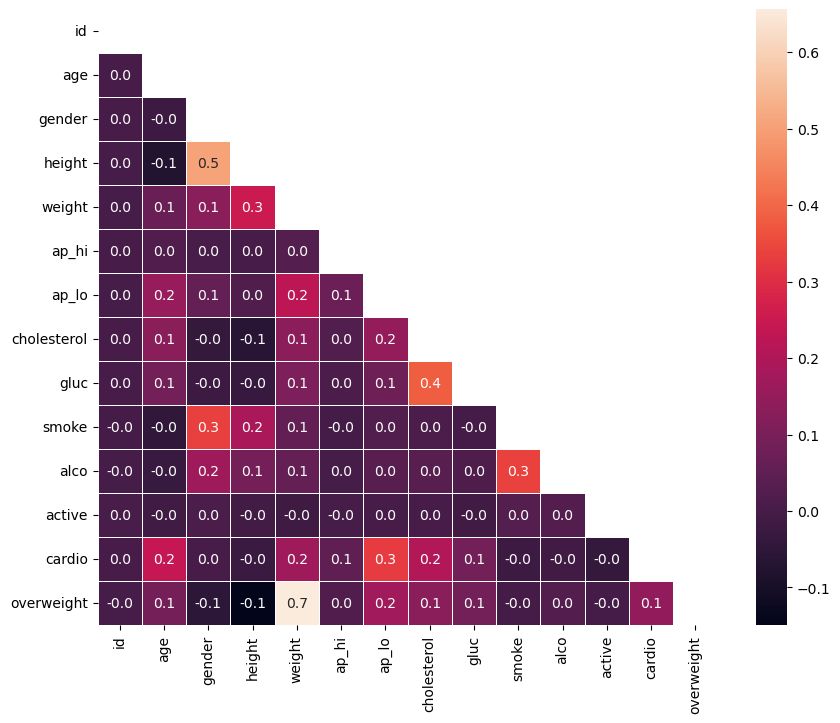

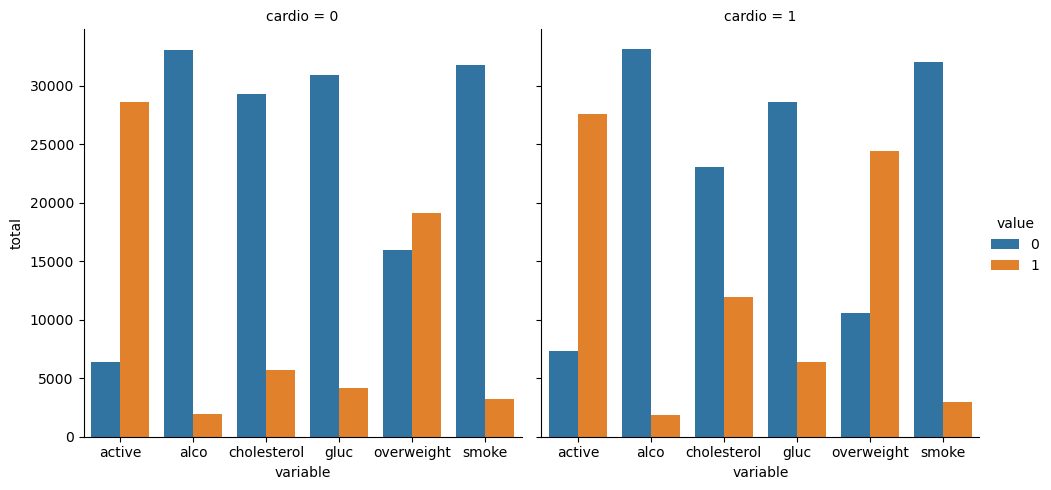

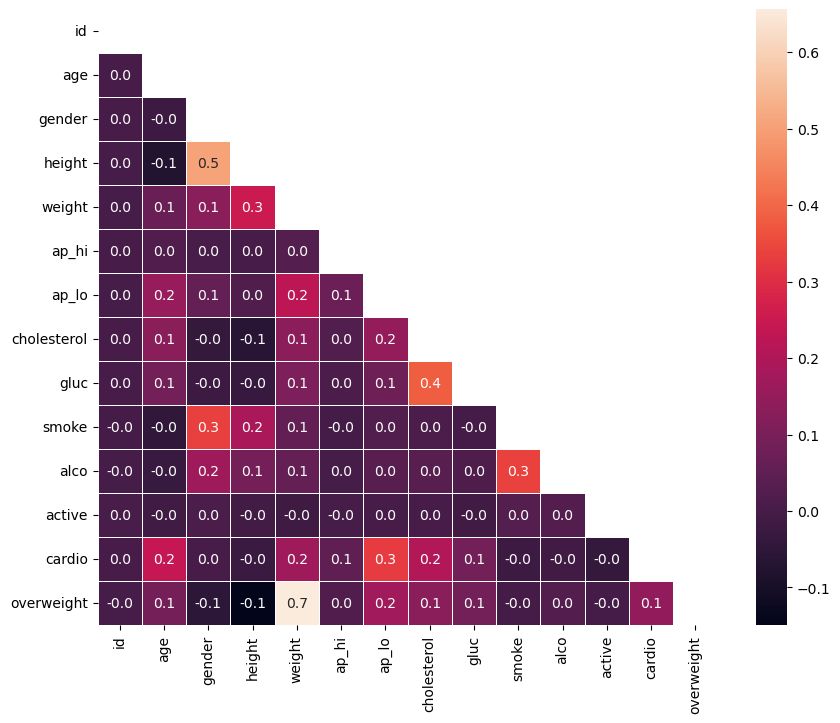

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/fuzzyray/medical-data-visualizer/main/medical_examination.csv")

df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar').fig
    fig.savefig('catplot.png')
    return fig

def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr))
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", linewidths=.5, ax=ax)
    fig.savefig('heatmap.png')
    return fig
draw_cat_plot()
draw_heat_map()
